In [16]:
# Librairies basiques d'exploitation et visualization de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import random # Pour pouvoir mélanger notre jeu de données

In [18]:
# Modules pour le pré-processing
from qualitative_prep import Qual_Standardize

from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as ACP
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler, FunctionTransformer

from sklearn.utils import shuffle

# Module pour l'exploration de la projection factorielle
from fanalysis.pca import PCA

# Modèle pour la modélisation
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

# Module pour l'affichage
from sklearn import set_config
set_config(display="diagram")

# Librairie pour la lecture et enregistrement des modèles
import pickle

In [19]:
# On importe le jeu de données
df = pd.read_csv("data_train.csv")

# Local

In [20]:
# On ne garde que les biens de type "Local"
loc = df.loc[df["Type local"] == "Local"]
loc.head(15)

,Valeur fonciere,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,Normalized_Mutations
29,78300.0,Local,0.0,0,783.0,1.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
74,55000.0,Local,75.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
75,55000.0,Local,75.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
86,110000.0,Local,98.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
87,110000.0,Local,98.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
94,65000.0,Local,100.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
95,65000.0,Local,100.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
134,130000.0,Local,170.0,0,542.0,1.0,2018,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
135,130000.0,Local,170.0,0,542.0,1.0,2018,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
168,80000.0,Local,104.0,0,0.0,0.0,2018,3,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454


In [21]:
loc.duplicated().sum()/loc.shape[0]

0.18856523655598

In [22]:
loc = loc[loc.duplicated()]

In [23]:
loc.drop(columns=["month"], inplace=True)

In [24]:
loc.drop(columns=["nom_region", "Type local", "Nombre pieces principales", "Normalized_Mutations", "year"], inplace=True)

In [25]:
loc.head()

,Valeur fonciere,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
75,55000.0,75.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
87,110000.0,98.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
95,65000.0,100.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
135,130000.0,170.0,542.0,1.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
169,80000.0,104.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [26]:
# On réalise une estimation du prix du bien en se basant sur le premier quartile du prix au m2 et la surface réelle bati (car les biens ont tendance à être moins cher)
loc["estimated"] = loc["q1_prixm2"]*loc["Surface reelle bati"]
loc.head(50)

,Valeur fonciere,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
75,55000.0,75.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,124662.500000
87,110000.0,98.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,162892.333333
95,65000.0,100.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,166216.666667
135,130000.0,170.0,542.0,1.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,282568.333333
169,80000.0,104.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,172865.333333
173,70000.0,120.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,199460.000000
223,67000.0,63.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,104716.500000
233,125000.0,73.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,121338.166667
235,56000.0,87.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,144608.500000
247,65000.0,53.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,88094.833333


In [28]:
# On déclare nos variables quantitatives
quant_columns = [
       "Surface reelle bati",'Surface terrain','pop_active',
       'salaire_moyen', 'nb_etab_elem', "mean_prixm2","q1_prixm2","q3_prixm2","Total_Mutations"]

# On déclare nos variables quantitatives
cat_columns = [ 'exterieur']

In [30]:
# On crée une première pipeline qui va centrer et réduire nos variables quantitatives
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())]
)


# On crée une seconde pipeline qui va créer un tableau disjonctif de notre variable qualitative puis la standardiser
categorical_transformer = Pipeline(
    steps=[("disjonctif", OneHotEncoder(handle_unknown="error")),
            ("standardize", Qual_Standardize())

    ]
)

# On crée un ColumnTransformer qui appliquera nos pipelines selon si elles sont qualitatives, quantitatives ou si c'est "Type local"
preprocessor = ColumnTransformer(
    transformers=[

        ("num", numeric_transformer, quant_columns),
        ("cat", categorical_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Surface reelle bati', 'Surface terrain',
                                  'pop_active', 'salaire_moyen', 'nb_etab_elem',
                                  'mean_prixm2', 'q1_prixm2', 'q3_prixm2',
                                  'Total_Mutations']),
                                ('cat',
                                 Pipeline(steps=[('disjonctif',
                                                  OneHotEncoder()),
                                                 ('standardize',
                                                  <__main__.Qual_Standardize object at 0x000001C400029370>)]),
                                 ['exterieur'])])

In [31]:
# On convertit notre variable extérieur en booléen.
loc["exterieur"] = loc["exterieur"].astype(bool)

In [32]:
# On extrait les variables exogènes
l_X = loc.iloc[:,1:]
l_X.head()

,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
75,75.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,124662.500000
87,98.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,162892.333333
95,100.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,166216.666667
135,170.0,542.0,True,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,282568.333333
169,104.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,172865.333333


In [33]:
# On extrait notre variable endogène
l_y = loc.iloc[:,0]
l_y.head()

75      55000.0
87     110000.0
95      65000.0
135    130000.0
169     80000.0
Name: Valeur fonciere, dtype: float64

In [34]:
# On divise notre jeu de données en un échantillon d'apprentissage et un test
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X,l_y, test_size=0.33, random_state=1)

In [35]:
l_X_train.head()

,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
534012,160.0,0.0,False,522553.0,15.104489,453,2413.042068,1757.121601,3154.389184,46727,281139.456099
1313312,21.0,0.0,False,255085.0,14.186588,411,1460.465703,1149.381250,1707.333000,13119,24137.006250
1578687,35.0,0.0,False,702047.0,18.863818,341,4918.896176,3767.871500,6025.591000,19913,131875.502500
220989,180.0,180.0,True,314664.0,14.478280,332,2063.042982,1539.534091,2460.363636,23509,277116.136364
784823,61.0,0.0,False,218624.0,14.215535,323,1558.632941,1199.283250,1803.125000,16220,73156.278250


In [36]:
l_y_train.head()

534012     171000.00
1313312    190070.38
1578687     95000.00
220989     215000.00
784823      54500.00
Name: Valeur fonciere, dtype: float64

In [37]:
# On applique notre pipeline de préprocessing à nos données
X_train_preprocessed = preprocessor.fit_transform(l_X_train, l_y_train)

In [38]:
# On extrait notre modèle ayant appris sur l'échantillon d'apprentissage.
preprocessing_pkl_file = "local_preprocessing.pkl"  

with open(preprocessing_pkl_file, 'wb') as file:  
    pickle.dump(preprocessor, file)

In [39]:
# On récupère les noms de colonnes de notre tableau disjonctif de nos variables qualitatives
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['disjonctif'].get_feature_names_out(cat_columns)
cat_feature_names

array(['exterieur_False', 'exterieur_True'], dtype=object)

In [40]:
# On crée une liste avec toutes nos variables (dans l'ordre de la pipeline)
all_feature_names = np.concatenate([quant_columns, cat_feature_names])

In [41]:
# On transforme notre échantillon d'apprentissage
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_train_preprocessed

,Surface reelle bati,Surface terrain,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,exterieur_False,exterieur_True
0,1.921191,-0.366729,0.325459,-0.127109,-0.002807,0.046005,-0.035881,0.293313,0.705870,1.159147,0.000000
1,-1.141174,-0.366729,-0.644980,-0.586276,-0.180376,-0.876225,-0.747995,-0.896426,-0.726812,1.159147,0.000000
2,-0.832735,-0.366729,0.976706,1.753441,-0.476324,2.472028,2.320196,2.653956,-0.437190,1.159147,0.000000
3,2.361819,0.697953,-0.428813,-0.440361,-0.514374,-0.292844,-0.290837,-0.277300,-0.283895,0.000000,1.977417
4,-0.259918,-0.366729,-0.777269,-0.571796,-0.552424,-0.781185,-0.689523,-0.817668,-0.594619,1.159147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6873,0.665401,-0.366729,-0.636834,-0.707332,0.043699,-0.674042,-0.689836,-0.670655,-0.423250,1.159147,0.000000
6874,-0.215855,-0.366729,-0.804568,0.142656,-0.598931,0.557615,0.388926,0.559189,-0.679281,1.159147,0.000000
6875,-0.171792,-0.366729,0.210614,0.506597,-0.298755,0.969226,0.260374,1.406569,2.528439,1.159147,0.000000
6876,-1.603834,1.585188,-0.354176,-0.408628,0.107117,-0.638791,-0.555495,-0.590943,-0.074586,0.000000,1.977417


In [42]:
# On transforme notre échantillon d'apprentissage
X_test_preprocessed = pd.DataFrame(preprocessor.fit_transform(l_X_test), columns=all_feature_names)
X_test_preprocessed

,Surface reelle bati,Surface terrain,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,exterieur_False,exterieur_True
0,1.426559,0.255108,-1.031698,-1.056139,-0.798885,-0.828209,-0.755410,-0.856355,-0.556403,0.000000,1.989752
1,-0.807280,-0.099980,-0.978640,-0.483765,-0.772748,-1.184609,-0.959588,-1.215112,-0.593233,0.000000,1.989752
2,-1.633800,0.108564,1.003070,1.847090,-0.507025,2.573210,2.441860,2.738251,-0.455812,0.000000,1.989752
3,1.940341,-0.370523,-1.179611,-0.632420,-1.086389,-0.843009,-0.720462,-0.917082,-1.057068,1.156693,0.000000
4,0.488346,-0.370523,-0.009962,0.197550,-0.149823,1.589743,1.788680,1.346732,-0.456406,1.156693,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3384,1.649942,-0.370523,0.317035,-0.012231,0.460034,-0.365413,-0.342677,-0.437130,0.032873,1.156693,0.000000
3385,-0.449866,1.049829,-0.193081,-0.585693,0.477459,-0.593848,-0.428495,-0.685515,0.498577,0.000000,1.989752
3386,0.622377,-0.370523,0.215789,0.538953,-0.324068,1.021661,0.295611,1.459420,2.499408,1.156693,0.000000
3387,0.175609,2.132002,1.753961,1.182452,1.183151,0.609507,0.490070,0.762008,-0.388354,0.000000,1.989752


# Application de notre AFDM (ACP sur nos données quantitatives standardisées et qualitatives one-hot encodées et standardisées)

In [43]:
# On instantie notre ACP
my_pca = PCA(std_unit=True, row_labels=X_train_preprocessed.index.values, col_labels=X_train_preprocessed.columns.values)
my_pca

PCA(col_labels=array(['Surface reelle bati', 'Surface terrain', 'pop_active',
       'salaire_moyen', 'nb_etab_elem', 'mean_prixm2', 'q1_prixm2',
       'q3_prixm2', 'Total_Mutations', 'exterieur_False',
       'exterieur_True'], dtype=object),
    row_labels=array([   0,    1,    2, ..., 6875, 6876, 6877], dtype=int64))

In [44]:
# On la fait apprendre sur notre échantillon d'apprentissage 
my_pca.fit(X_train_preprocessed.values)
print(my_pca.eig_)

[[4.65577778e+00 2.34764676e+00 1.61628151e+00 9.19287716e-01
  6.71721821e-01 4.65935775e-01 2.54813805e-01 3.70124027e-02
  3.04862695e-02 1.03616207e-03 2.83821662e-27]
 [4.23252526e+01 2.13422433e+01 1.46934683e+01 8.35716105e+00
  6.10656201e+00 4.23577977e+00 2.31648913e+00 3.36476388e-01
  2.77147904e-01 9.41965516e-03 2.58019693e-26]
 [4.23252526e+01 6.36674958e+01 7.83609641e+01 8.67181251e+01
  9.28246871e+01 9.70604669e+01 9.93769561e+01 9.97134324e+01
  9.99905803e+01 1.00000000e+02 1.00000000e+02]]


In [45]:
eigenvalues = pd.DataFrame({'eigenvalue' : my_pca.eig_[0]}) # Création d'un DataFrame à partir des valeurs propres du modèle AFC.
eigenvalues = eigenvalues.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

# Conversion de la colonne "index" en type catégorie
eigenvalues["index"] = eigenvalues["index"].astype("category")

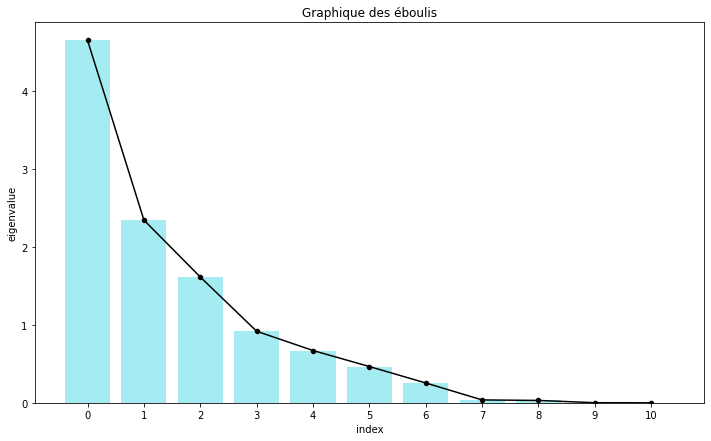

In [46]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour les valeurs propres.
sns.barplot(data=eigenvalues, x="index", y="eigenvalue", color="#98F5FF", ax=axes)
# Ajout d'un scatter plot pour les points des valeurs propres.
sns.scatterplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des valeurs propres.
sns.lineplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
plt.title("Graphique des éboulis")
plt.show()

In [47]:
 # Création d'un DataFrame à partir des pourcentages d'inertie du modèle AFC.
pourcentage = pd.DataFrame({'pourcentage' : my_pca.eig_[1]})
pourcentage = pourcentage.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

pourcentage["index"] = pourcentage["index"].astype("category") # Conversion de la colonne "index" en type catégorie

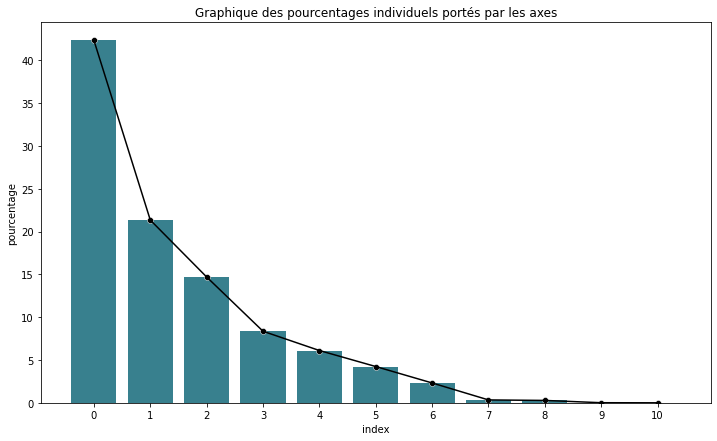

In [48]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages.
sns.barplot(data=pourcentage, x="index", y="pourcentage", color="#2a8a9c", ax=axes)
# Création d'un graphique à barres pour représenter les pourcentages.
sns.scatterplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des pourcentages.
sns.lineplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# On obtient les valeurs minimales et maximales sur l'axe x.
xmin, xmax = axes.get_xlim() 
# On affiche une ligne horizontale qui représente le seuil de Kaiser.
plt.title("Graphique des pourcentages individuels portés par les axes")
plt.show()

In [49]:
cumsum = pd.DataFrame({'cumsum' : my_pca.eig_[2]}) # Création d'un DataFrame à partir des sommes cumulées d'inertie du modèle AFC.
cumsum = cumsum.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.
# Conversion de la colonne "index" en type catégorie.
cumsum["index"] = cumsum["index"].astype("category")

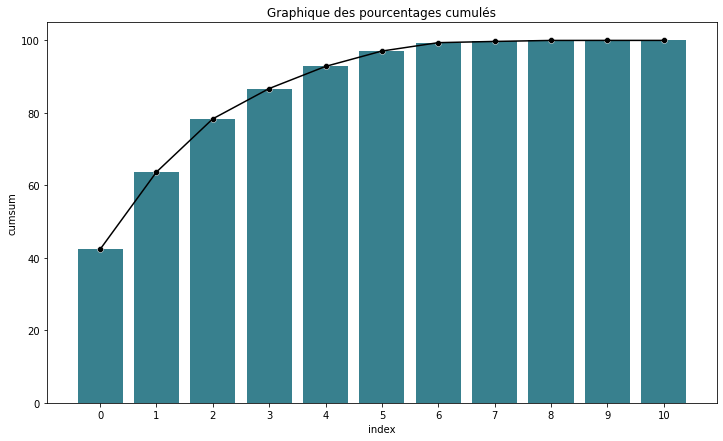

In [50]:
plt.figure(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages cumulés.
sns.barplot(data=cumsum, x="index", y="cumsum", color="#2a8a9c")
# Ajout d'un scatter plot pour les points des pourcentages cumulés.
sns.scatterplot(data=cumsum, x="index", y="cumsum", color="black")
# Ajout d'une ligne pour connecter les points des pourcentages cumulés.
sns.lineplot(data=cumsum, x="index", y="cumsum", color="black")
plt.title("Graphique des pourcentages cumulés")
plt.show()

Pour nous décider sur le nombre de composantes, nous allons nous baser sur le seuil de Kaiser à 3 composantes. Nous expliquons 80% de la variance avec ces composantes, toutefois, cela est biaisé par la présence de la variable qualitative.

In [51]:
# On extrait les valeurs en relation avec les variables
df_cols = my_pca.col_topandas()

In [52]:
# On extrait la contribution des variables à la définition des composantes
var_contrib = df_cols.iloc[:,11:14]
var_contrib

,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3
Surface reelle bati,1.479276,2.680470,0.000329
Surface terrain,3.044520,19.190753,3.494033
pop_active,10.978959,8.218217,14.658082
salaire_moyen,13.922789,2.158274,4.178161
nb_etab_elem,2.969913,8.379450,34.806751
mean_prixm2,18.043780,0.465600,7.531127
q1_prixm2,16.494230,0.893380,9.501468
q3_prixm2,17.956474,0.339797,5.895072
Total_Mutations,5.301296,2.587404,14.799699
exterieur_False,4.904381,27.543328,2.567640


In [53]:
# On extrait la qualité de représentation des variables sur les composantes
var_cos2 = df_cols.iloc[:,22:25]
var_cos2

,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3
Surface reelle bati,0.068872,0.062928,0.000005
Surface terrain,0.141746,0.450531,0.056473
pop_active,0.511156,0.192935,0.236916
salaire_moyen,0.648214,0.050669,0.067531
nb_etab_elem,0.138273,0.196720,0.562575
mean_prixm2,0.840078,0.010931,0.121724
q1_prixm2,0.767935,0.020973,0.153570
q3_prixm2,0.836014,0.007977,0.095281
Total_Mutations,0.246817,0.060743,0.239205
exterieur_False,0.228337,0.646620,0.041500


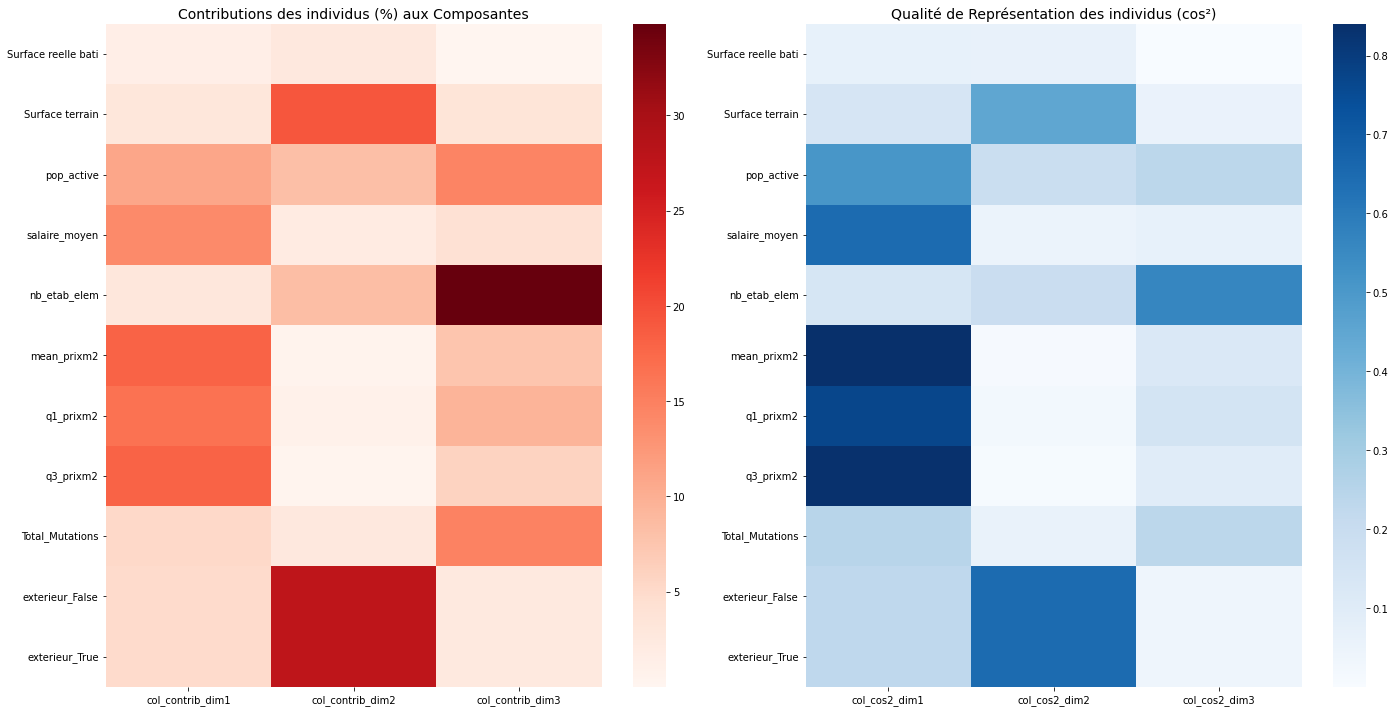

In [54]:
# On visualise les contributions et qualité de représentation grâce à des heatmaps.
fig = plt.figure(figsize=(20, 10))
spec = fig.add_gridspec(ncols=2, nrows=1)

ax0 = fig.add_subplot(spec[0, 0])
sns.heatmap(var_contrib, cmap="Reds", ax=ax0)
ax0.set_title("Contributions des individus (%) aux Composantes", fontsize=14)

ax1 = fig.add_subplot(spec[0, 1])
sns.heatmap(var_cos2, cmap="Blues", ax=ax1)
ax1.set_title("Qualité de Représentation des individus (cos²)", fontsize=14)


plt.tight_layout()
plt.show()

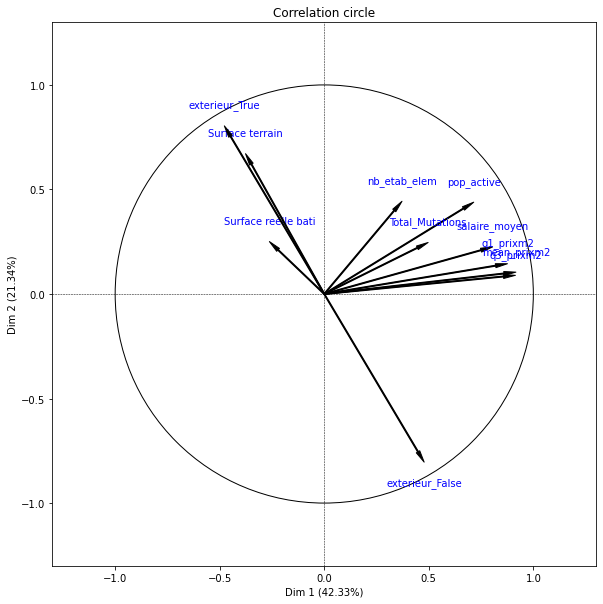

In [55]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(20, 10))

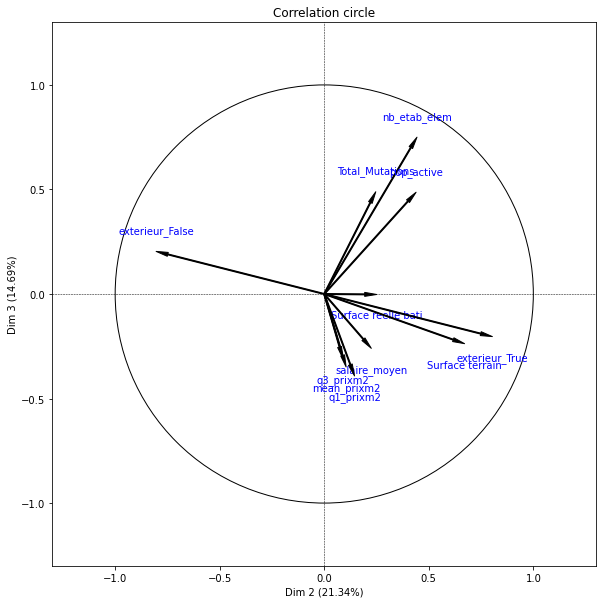

In [56]:
my_pca.correlation_circle(num_x_axis=2, num_y_axis=3, figsize=(20, 10))

La première composante semble être reliée positivement au prix au m2 du bien et le salaire moyen horaire dans le département. Elle semble être liée à la **richesse** du département.
La seconde composante semble plutôt liée positivement aavec la **grandeur du terrain** (liée positivement avec Surface_terrain et exterieur_True). 
La troisième composante enfin semble plutôt liée avec des **caractéristiques démographiques de grandes agglomérations** (nombre d'écoles élémentaires élevé, nombre de vente de biens par département élevé et pourcentage de population active élevé).

In [57]:
# On vérifie la corrélation de la variable endogène avec les composantes.
df_rows = my_pca.row_topandas()
ind_coord = df_rows.iloc[:,0:3]
# Pour chaque facteur, on calcule la corrélation
for col in ind_coord.columns:
    coef = np.corrcoef(l_y_train, ind_coord[col])
    print(coef)

[[1.        0.1447473]
 [0.1447473 1.       ]]
[[1.         0.15510763]
 [0.15510763 1.        ]]
[[ 1.         -0.07795059]
 [-0.07795059  1.        ]]


On retrouve une corrélation positive légère entre la richesse et la grandeur du terrain avec le prix de vente du bien, et une corrélation non pertinente avec la troisième composante.

In [58]:
# On crée une pipeline qui va appliquer notre préprocessing développé plus haut, puis applique une ACP à trois composantes (le nombre de composantes final).
afdm = Pipeline(
    steps=[("preprocessor", preprocessor), ("factorial", ACP(n_components=3))]
)
afdm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Surface reelle bati',
                                                   'Surface terrain',
                                                   'pop_active',
                                                   'salaire_moyen',
                                                   'nb_etab_elem',
                                                   'mean_prixm2', 'q1_prixm2',
                                                   'q3_prixm2',
                                                   'Total_Mutations']),
                                                 ('cat',
                                                  Pipeline(steps=[('disjonctif',
                                                                   OneHotEncoder()),
                                                                  ('standardize',
                                                                   <__main__.Qual_Standardize object at 0x000001C400029370>)]),
                                                  ['exterieur'])])),
                ('factorial', PCA(n_components=3))])

In [59]:
# On fait apprendre notre pipeline sur notre AFDM d'apprentissage et on transforme notre échantillon d'apprentissage
l_X_train_afdm = pd.DataFrame(afdm.fit_transform(l_X_train))
l_X_train_afdm.head()

,0,1,2
0,0.300539,0.388210,-0.221125
1,-1.487377,-0.871078,-1.068270
2,4.309846,-1.629047,1.453362
3,-1.514460,1.060433,1.803552
4,-1.567058,-0.923498,-0.681764


In [60]:
# On remet l'index de y_train à 0 pour s'aligner avec notre X_train transformée.
d_y_train= l_y_train.reset_index().drop(columns=["index"])["Valeur fonciere"]

In [61]:
# On transforme notre échantillon validation  en utilisant les informations tirées de l'échantillon d'apprentissage
X_test_afdm = pd.DataFrame(afdm.transform(l_X_test))
X_test_afdm.head()

,0,1,2
0,-2.567816,0.461711,1.132281
1,-2.425997,-0.049344,0.302616
2,3.945577,-0.699914,2.609384
3,-2.238570,-0.964024,0.166638
4,1.980536,-1.100801,0.875345


## On commence par un modèle de régression avec descente de gradient stochastique
Cela nous permet de pouvoir envoyer des lots de données et non tout le jeu de données d'un coup

In [62]:
epoch = 10 # On établit combien de fois notre jeu de données passera entièrement par notre modèle de regression
batch_size =  2**6
num_samples = len(l_X_train_afdm) # On décrit la taille de l'échantillon d'apprentissage

In [63]:
mse_list = []

In [74]:
for eta in [1, 0.01, 0.001]:
    print(f'Eta0 en cours: {eta}')
    for alpha_val in [0.0001, 0.001, 0.01]:
        print(f'Alpha en cours: {alpha_val}')
        for l1_rat in [0, 0.25, 0.5, 0.75,1]:
            print(f'L1 en cours: {l1_rat}')
            sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=alpha_val,learning_rate='optimal', eta0=eta, l1_ratio=l1_rat, shuffle=False)
            for k in range(1,epoch+1):
                    # On affiche la progression
                    progress = (k/epoch)*100  
                    print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

                    # On mélange notre jeu de données 
                    X_shuffled, y_shuffled = shuffle(l_X_train_afdm, d_y_train)

                    # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
                    for i in range(0, num_samples, batch_size):                    
                        X_mini_batch = X_shuffled[i:i+batch_size]
                        y_mini_batch = y_shuffled[i:i+batch_size]

                        # Tant que la taille du batch n'est pas égal à zéro, on continue
                        if len(X_mini_batch) > 0:
                            sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
                        else:
                            break

                # On prédit les valeurs de y pour l'échantillon test
            y_pred = sgd_regressor.predict(X_test_afdm)
                    # On extrait la moyenne des résidus au carré
            mse = mean_squared_error(l_y_test, y_pred)
                    # On affiche le socre du modèle.
            mse_list.append(mse)
            print(f"Mean Squared Error: {mse}")

Eta0 en cours: 1
Alpha en cours: 0.0001
L1 en cours: 0
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 7024760626.824997
L1 en cours: 0.25
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 58366942044.80054
L1 en cours: 0.5
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progr

In [75]:
min(mse_list)

6002519109.313104

In [76]:
# On crée un dataframe avec nos valeurs prédites, observées et nos résidus.
df_graph = pd.DataFrame({'predicted':  y_pred,
              'observed': l_y_test,
              'residual': l_y_test - y_pred})

df_graph.head(30)

,predicted,observed,residual
157164,150589.332070,180000.0,29410.667930
1308372,142297.742487,80000.0,-62297.742487
1579811,167537.393436,345000.0,177462.606564
637312,136568.381423,58000.0,-78568.381423
1173437,149334.465810,192000.0,42665.534190
576046,140250.900429,172800.0,32549.099571
150857,129597.598221,85000.0,-44597.598221
1295495,132481.118347,85000.0,-47481.118347
182700,160442.665457,180000.0,19557.334543
101302,145222.659217,63500.0,-81722.659217


## On compare avec un arbre de décision

In [65]:
# On instantie notre arbre de décision
regr_1 = DecisionTreeRegressor()
# On apprend notre arbre de décision sur notre échantillon d'apprentissage
regr_1.fit(l_X_train, d_y_train)
# On récupère les prédictions sur l'échantillon de validation
y_1 = regr_1.predict(l_X_test)

In [66]:
# On calcule l'erreur moyenne au carré
mean_squared_error(l_y_test, y_1)

5354069323.111406

In [67]:
# Pour avoir le meilleur modèle, on applique un GridSearchCV
parameters = {'min_samples_split': [100,500,1000,5000,10000], 
               'min_samples_leaf':[50,250,500,2500,5000],
               'random_state':[42]
               }

# On applique comme score le "neg_mean_squared_error" car GridSearchCV va essayer de maximiser le score
grid_reg = GridSearchCV(regr_1, parameters, scoring="neg_mean_squared_error", cv=None)
grid_reg.fit(l_X_train, d_y_train)
y_1 = grid_reg.predict(l_X_test)

In [68]:
mean_squared_error(l_y_test, y_1)

5140335863.906445

In [69]:
# On enregistre le modèle d'arbre de régression avec les meilleurs hyperparamètres pour l'échantillon de test final
model_pkl_file = "local_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid_reg.best_estimator_, file)

On extrait l'importance de chaque variables dans l'arbre de décision.

In [70]:
feat_import = pd.DataFrame({"importance": grid_reg.best_estimator_.feature_importances_, "variables": l_X_train.columns}).sort_values(by="importance", ascending=False)
feat_import

,importance,variables
10,0.433064,estimated
0,0.191788,Surface reelle bati
5,0.097825,nb_etab_elem
4,0.095940,salaire_moyen
3,0.063295,pop_active
1,0.050205,Surface terrain
9,0.040467,Total_Mutations
7,0.011507,q1_prixm2
8,0.008689,q3_prixm2
6,0.007220,mean_prixm2


C'est principalement l'estimation du prix et la surface réelle du batiment qui sont clés. Ensuite, quelques variables démographiques.

<Axes: xlabel='importance', ylabel='variables'>

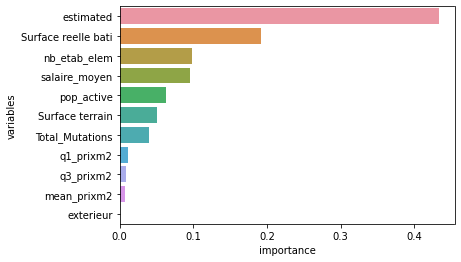

In [71]:
sns.barplot(data=feat_import,  x="importance",y="variables")

# On compare avec une régression linéaire simple

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
l_reg = LinearRegression().fit(l_X_train_afdm, d_y_train)
y_pred_reg = l_reg.predict(X_test_afdm)
mean_squared_error(l_y_test, y_pred_reg)

6001301393.901099

Comme avec notre régression par batch training, on retrouve  un score supérieur à celui de notre arbre de décision. Nous garderons donc celui-ci.